<a href="https://colab.research.google.com/github/Cooper1217/BME3053C-Spring-2025/blob/main/HW/All_HWs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BME3053C - Computer Applications for BME

<br/>

<h1 align="center">Homework
</h1>

---

<center><h2>In order most recent on top</h2></center>


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/uf-bme/bme3053c/blob/main/lessons/01_welcome_bme3053c.ipynb)

HW5

In [170]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [171]:
#these are all just from the canvas assignment

def generate_star(center=(0, 0), num_points=5, outer_radius=1, inner_radius=0.5,homogeneous=False):
  angles = np.linspace(np.pi/2, 5*np.pi/2, num_points*2, endpoint=False)
  radii = np.array([outer_radius, inner_radius] * num_points)
  x = radii * np.cos(angles) + center[0]
  y = radii * np.sin(angles) + center[1]
  return np.column_stack((x, y)) if not homogeneous else np.column_stack((x, y, np.ones(num_points*2)))

def plot_star(ax, star, title,global_view):
    ax.plot(star[:, 0], star[:, 1], 'b-')
    ax.plot([star[-1, 0], star[0, 0]], [star[-1, 1], star[0, 1]], 'b-')  # Connect last to first
    ax.set_title(title)
    ax.axis('equal')
    if global_view:
      ax.set_xlim(-10,10)
      ax.set_ylim(-10,10)
      ax.axhline(0, color='black')
      ax.axvline(0, color='black')

    ax.grid(True)  # Add grid

    star_center = np.mean(star, axis=0)
    arrow_start = star_center

    vector_to_point = star[0] - star_center
    direction = vector_to_point/np.linalg.norm(vector_to_point)  # Normalize the direction vector
    arrow_length = np.linalg.norm(vector_to_point)/2
    arrow_end = star_center + (arrow_length) * direction
    headwidth=6 if global_view else 8
    width = 1 if global_view else 2
    ###########################################
    ax.annotate('', xy=arrow_end, xytext=arrow_start,
                arrowprops=dict(facecolor='green', shrink=0.05, width=width, headwidth=headwidth))

def plot_stars(stars,global_view=False):
    if len(stars) == 1 or not isinstance(stars, list):
        print("There must be a list of multiple stars to plot")
        return
    num_stars = len(stars)
    fig, axs = plt.subplots(1, num_stars, figsize=(10, 5))
    for i, star in enumerate(stars):
        plot_star(axs[i], star[:,:2], f'Star {i+1}',global_view)

def rotate(angle_degrees):
    angle_radians = np.radians(angle_degrees)
    cos_theta = np.cos(angle_radians)
    sin_theta = np.sin(angle_radians)
    return np.array([
        [cos_theta, -sin_theta,0],
        [sin_theta, cos_theta,0],
        [0,0,1],
    ])

def scale(sx,sy):
    return np.array([
        [sx, 0,0],
        [0, sy,0],
        [0,0,1],
    ])

def translate(tx, ty):
    return np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])



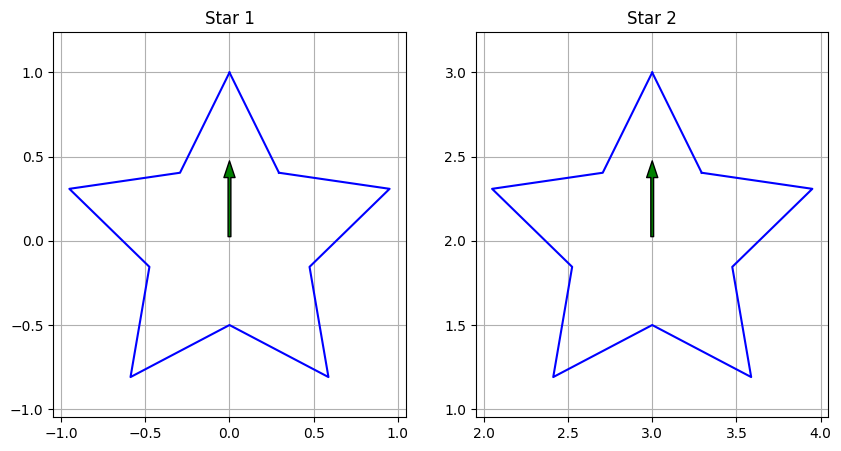

In [172]:
#translated up 2
cell_three = generate_star(center=(0,0), num_points=5, outer_radius=1, inner_radius=0.5, homogeneous=True)
translated_three = translate(3,2)
translated_cell_three = (translated_three @ cell_three.T).T
plot_stars([cell_three, translated_cell_three])




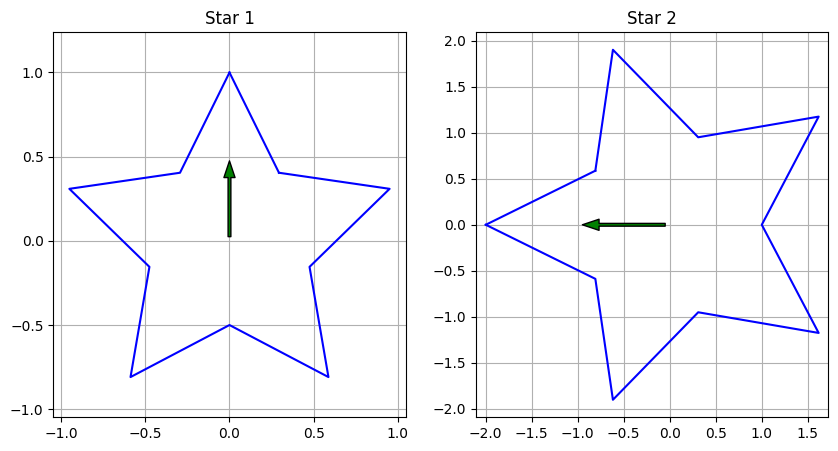

In [173]:
#rotated 90 degrees and scaled up by 2
cell_four = generate_star(center=(0,0), num_points=5, outer_radius=1, inner_radius=0.5, homogeneous=True)
rotated_four = rotate(90)
scaled_by_2 = scale(2,2)
new_four = rotated_four @ scaled_by_2   #this is the combining
new_4 = (new_four @ cell_four.T).T
plot_stars([cell_four, new_4])


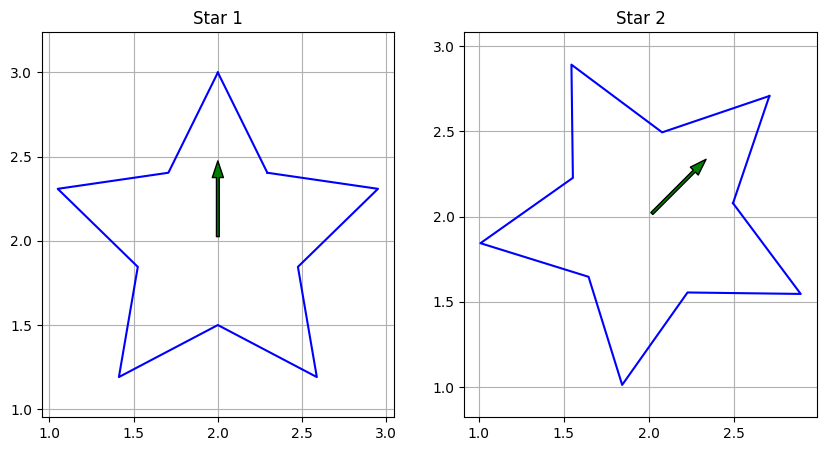

In [174]:
#rotated
cell_five = generate_star(center=(2,2), num_points=5, outer_radius=1, inner_radius=0.5, homogeneous=True)
rotated_five = rotate(315)
translated_five = translate(-.83,2)
new_five = translated_five @ rotated_five
new_5 = (new_five @ cell_five.T).T


plot_stars([cell_five, new_5])

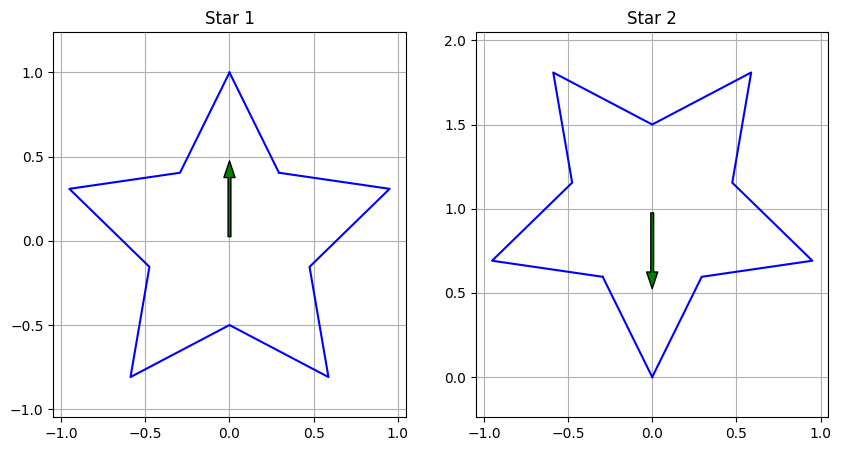

In [175]:
#rotated 180 and translated up 1
cell_six = generate_star(center=(0,0), num_points=5, outer_radius=1, inner_radius=0.5, homogeneous=True)
rotated_six = rotate(180)
translated_six = translate(0,1)
new_six = translated_six @ rotated_six
new_six_2 = (new_six @ cell_six.T).T



plot_stars([cell_six, new_six_2])

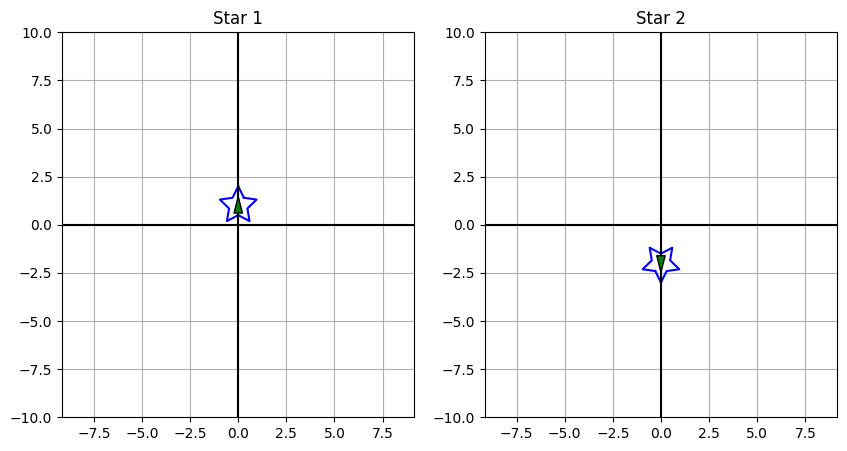

In [176]:
#rotated 180 and translated up 1
cell_seven = generate_star(center=(0,1), num_points=5, outer_radius=1, inner_radius=0.5, homogeneous=True)
rotated_seven = rotate(180)
translated_seven = translate(0,-1)
new_seven = translated_seven @ rotated_seven
new_seven_2 = (new_seven @ cell_seven.T).T



plot_stars([cell_seven, new_seven_2], True)

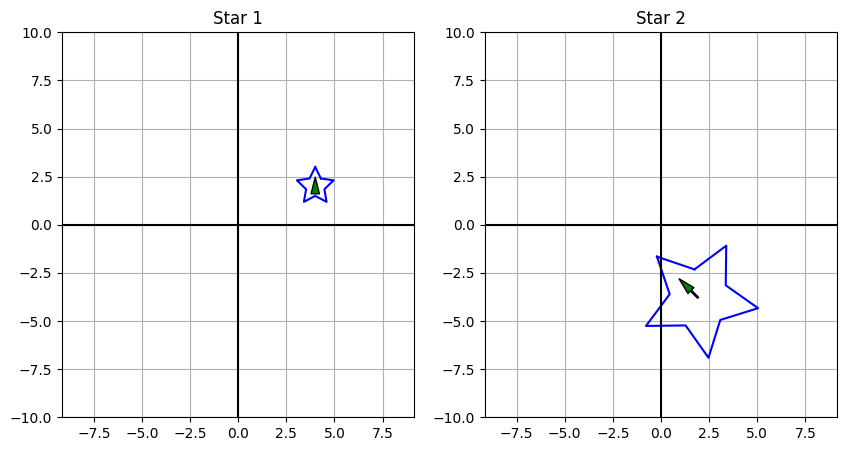

In [177]:
cell_eight = generate_star(center=(4,2), num_points=5, outer_radius=1, inner_radius=0.5, homogeneous=True)
rotated_eight = rotate(45)
translated_eight = translate(-2.4,-17)
scaled_eight = scale(3.1,3.1)
new_eight = translated_eight @ scaled_eight @ rotated_eight
new_eight_2 = (new_eight @ cell_eight.T).T



plot_stars([cell_eight, new_eight_2], True)

HW4

,0
Series,
I,"Axes(0.125,0.11;0.775x0.77)"
II,"Axes(0.125,0.11;0.775x0.77)"
III,"Axes(0.125,0.11;0.775x0.77)"
IV,"Axes(0.125,0.11;0.775x0.77)"


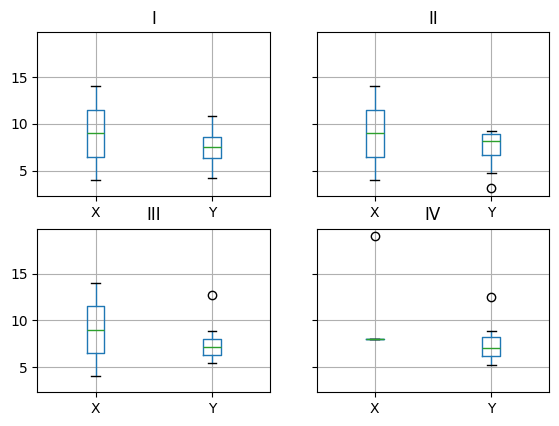

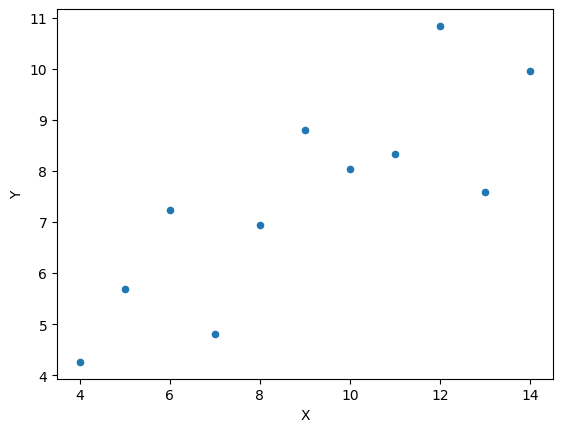

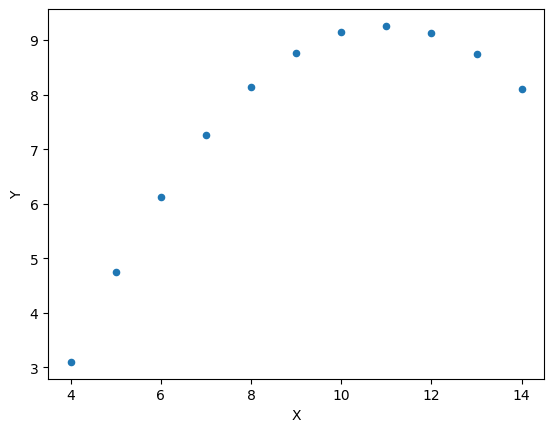

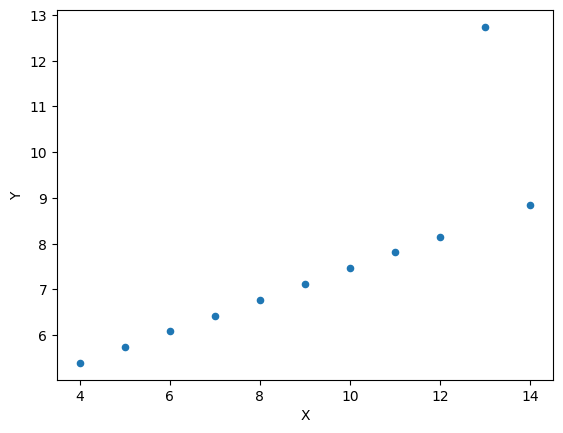

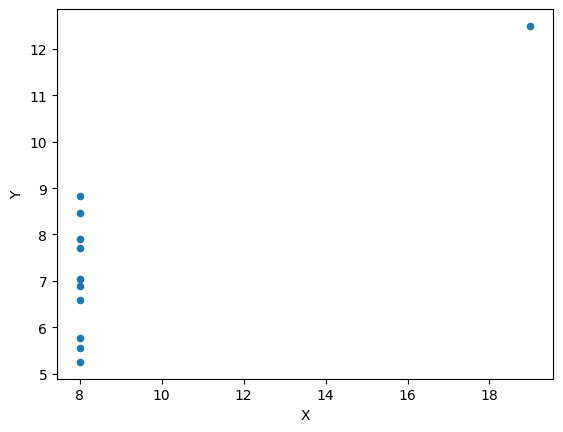

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

anscombe_df = pd.read_json('/content/sample_data/anscombe.json')
grouped_df = anscombe_df.groupby('Series')
grouped_df.describe()
grouped_df.boxplot()
grouped_df.plot.scatter(x = "X", y = "Y")


To start off, all four datasets had very different spreads in both the x and y directions. The first set was random, the second was an upsidedown porabola, the third was linear with one outlier, and the fourth was all in the same x position and ranging in the y value with one outlier as well. The scatter plot provided me with the ability to visualize the trends that are exhibited in the data, like linearity and a parabolic nature. The boxplot was able to show me the ranges for the coordinates and also show me that there were outliers much more clearly. The fourth data set had an outlier in both the x and y plot while series 3's ourlier still fit into the normal data in the x coordinate but stuck out in the y. I would not have been able to determine trends from the boxplot but would have been able to see outliers in the scatter plot, albeit not as easily. Looking at other trends in the data, with the exception of series four, the other three data sets typically had somewhat of a direct relationship between the x and y values. This is shown by the left side being towards the origin and going up from there at approximately a 45 degree angle. The parabolic curve follows this trend until the end portion starting around 11 when it starts going down again. Additionally, the ranges in the x coordinate are all roughly the same, as seen by the wiskers in the boxplot.

HW3

In [ ]:
import math
import random

ppg_signal = [1000 + 100 * math.sin(0.1 * x) + random.randint(-20, 20) for x in range(100)]
#ppg_signal = [1, 2, 3, 2, 1]
#len(ppg_signal)
def hw_three_function(input):
  list_length_minus_one = len(input)-1
  num_peaks = 0
  for spot in range(1, list_length_minus_one):
      if (input[spot-1] <  input[spot]) & (input[spot+1] < input[spot]):
        num_peaks += 1
  return(num_peaks)

print(hw_three_function(ppg_signal))

35


HW2


In [ ]:
bp_readings = [120, 137, 151, 123, 162, 173, 127, 154]

def normalizer(input):
  maximum = max(input)
  minimum = min(input)
  new_array = []
  # print(maximum)
  # print(minimum)
  for current_value in input:
    new_value = (current_value - minimum)/(maximum-minimum)
    new_array.append(new_value)

  return(new_array)



print(normalizer(bp_readings))



[0.0, 0.32075471698113206, 0.5849056603773585, 0.05660377358490566, 0.7924528301886793, 1.0, 0.1320754716981132, 0.6415094339622641]
